First 5 rows of dataset:
       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151


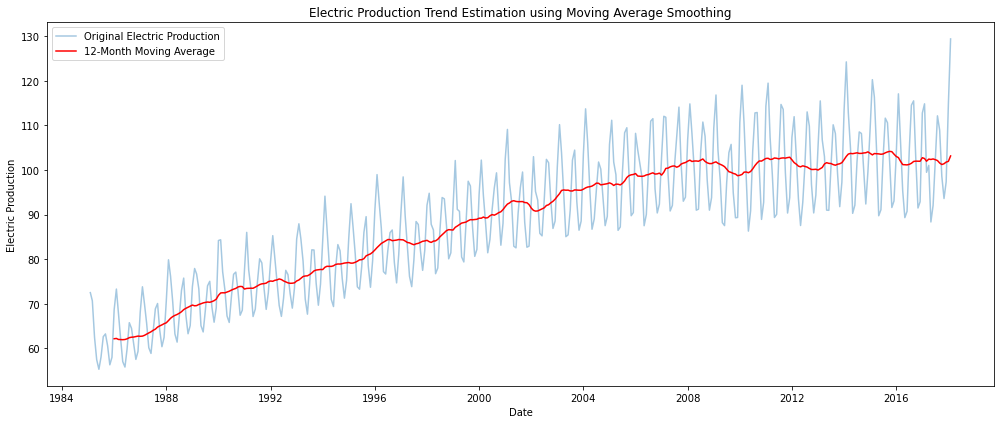

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (since it's uploaded in the same directory)
df = pd.read_csv("Electric_Production.csv")

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' as the index
df.set_index('DATE', inplace=True)

# Rename the column if necessary
df.rename(columns={df.columns[0]: 'Electric_Production'}, inplace=True)

# Resample the data monthly (average if needed)
df_monthly = df['Electric_Production'].resample('M').mean()

# Apply 12-month moving average smoothing
window_size = 12
df_smooth = df_monthly.to_frame(name='Electric_Production')
df_smooth['Moving_Avg'] = df_smooth['Electric_Production'].rolling(window=window_size).mean()

# Plot the original and smoothed series
plt.figure(figsize=(14, 6))
plt.plot(df_smooth['Electric_Production'], label='Original Electric Production', alpha=0.4)
plt.plot(df_smooth['Moving_Avg'], label=f'{window_size}-Month Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.title("Electric Production Trend Estimation using Moving Average Smoothing")
plt.legend()
plt.tight_layout()
plt.show()
